**Youtube Video Statistics**

In this Jupyter Notebook, I focussed on various key predictors like Comments, Dislikes, Views, and Likes. This notebook will guide you through the various methods like data wrangling, plotting, and analysing. In the lower part, I focussed on the Natural Language Processing. I predicted sentiments based on Tags, Description, and Title. I also formed WordCloud based on the frequency of the words.  

**Key - NLP, NLTK, TextBlob, Sentiments, WordCloud**

Note: Please do comment,  if the below scripts can be done in more suitable way. 





In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**In the dataset, the Trending Date and Published Time are not in the Unix date-time format. Let's fix this first. **

In [51]:
df_usa=pd.read_csv("./youtube/USvideos.csv")
df_usa_comments= pd.read_csv("./youtube/UScomments.csv",error_bad_lines=False)

b'Skipping line 114463: expected 4 fields, saw 5\n'
b'Skipping line 142494: expected 4 fields, saw 8\nSkipping line 189730: expected 4 fields, saw 6\nSkipping line 245216: expected 4 fields, saw 7\n'


b'Skipping line 388428: expected 4 fields, saw 5\n'


In [56]:
print(df_usa_comments.head(5))

print(df_usa_comments['comment_text'])

      video_id                                       comment_text  likes  \
0  XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️      4   
1  XpVt6Z1Gjjo  I've been following you from the start of your...      3   
2  XpVt6Z1Gjjo                 Say hi to Kong and maverick for me      3   
3  XpVt6Z1Gjjo                                MY FAN . attendance      3   
4  XpVt6Z1Gjjo                                         trending 😉      3   

   replies  
0        0  
1        0  
2        0  
3        0  
4        0  
0                         Logan Paul it's yo big day ‼️‼️‼️
1         I've been following you from the start of your...
2                        Say hi to Kong and maverick for me
3                                       MY FAN . attendance
4                                                trending 😉
5                                   #1 on trending AYYEEEEE
6                                      The end though 😭👍🏻❤️
7                                      #1 tre

In [78]:
from wordcloud import WordCloud

import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS

def wc(data,bgcolor,title,mask=None):
    plt.figure(figsize=(20,20))
    wc = WordCloud(background_color = bgcolor, max_words = 1000,  max_font_size = 50,mask=mask)
    wc.generate(' '.join(data))
    plt.imshow(wc,interpolation='bilinear')
    plt.axis('off')
    return wc
    

**To Count the frequency of words in Title column.**

     Word  Frequency
0    like      66873
1    love      61558
2   video      38164
3     one      33912
4  people      29925
5     get      29051
6    good      26511


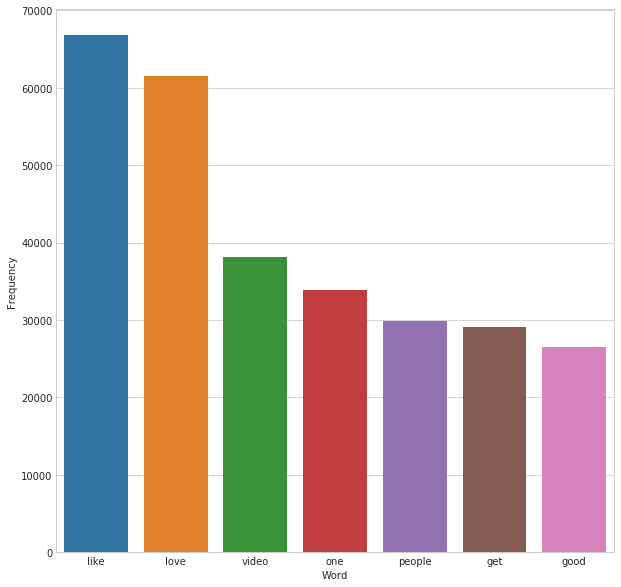

In [58]:
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
import re

top_N = 100
#convert list of list into text
#a=''.join(str(r) for v in df_usa['title'] for r in v)

a = df_usa_comments['comment_text'].str.lower().str.cat(sep=' ')

# removes punctuation,numbers and returns list of words
b = re.sub('[^A-Za-z]+', ' ', a)

#remove all the stopwords from the text
stop_words = list(get_stop_words('en'))         
nltk_words = list(stopwords.words('english'))   
stop_words.extend(nltk_words)

word_tokens = word_tokenize(b)
filtered_sentence = [w for w in word_tokens if not w in stop_words]
filtered_sentence = []
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

# Remove characters which have length less than 2  
without_single_chr = [word for word in filtered_sentence if len(word) > 2]

# Remove numbers
cleaned_data_title = [word for word in without_single_chr if not word.isnumeric()]        

# Calculate frequency distribution
word_dist = nltk.FreqDist(cleaned_data_title)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Word",y="Frequency", data=rslt.head(7))
print(rslt.head(7))

**WordCloud for Title Column**

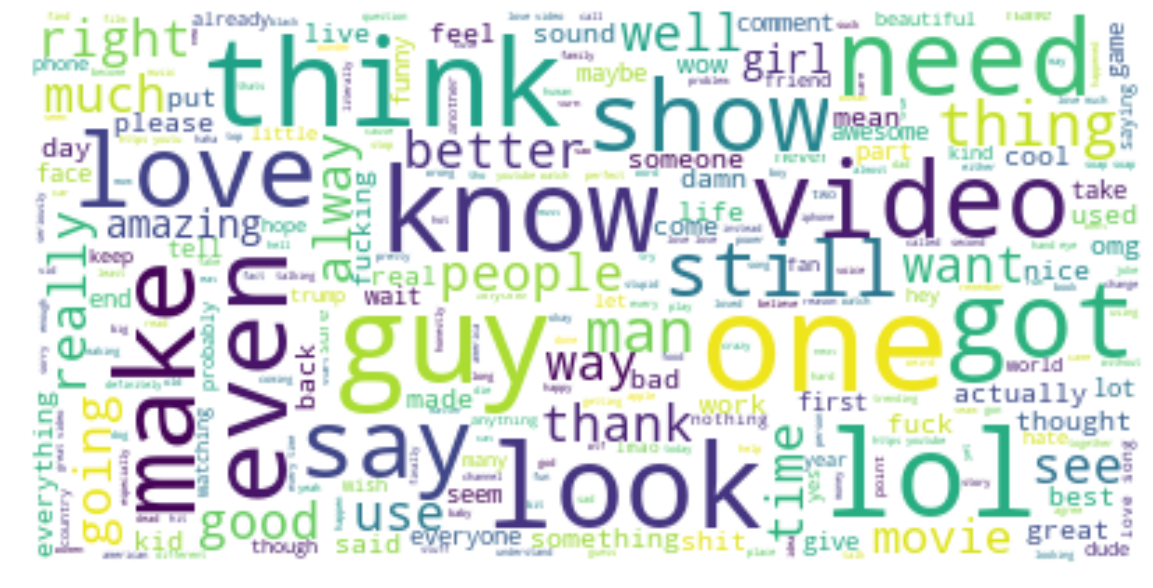

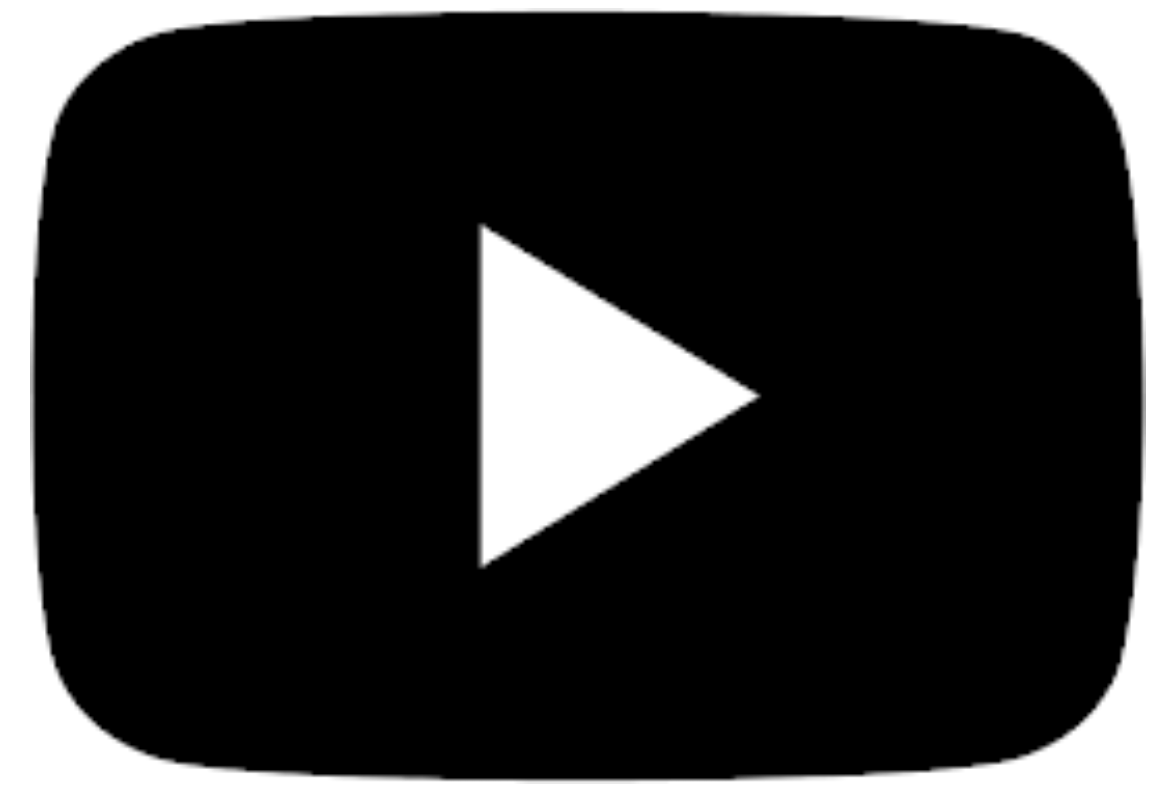

In [84]:
from PIL import Image
youtube_mask = np.array(Image.open("./youtube_logo_mask.png"))
word_cloud = wc(cleaned_data_title,'white','Common Words')

plt.figure(figsize= (20,20))
plt.imshow(youtube_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()


In [85]:

word_cloud.to_file("./wordcloud_comments.png")

**To Count the frequency of words in Tags column.**

In [ ]:
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
import re

top_N = 100
#convert list of list into text
#a=''.join(str(r) for v in df_usa['title'] for r in v)

tags_lower = df_usa['tags'].str.lower().str.cat(sep=' ')

# removes punctuation,numbers and returns list of words
tags_remove_pun = re.sub('[^A-Za-z]+', ' ', tags_lower)

#remove all the stopwords from the text
stop_words = list(get_stop_words('en'))         
nltk_words = list(stopwords.words('english'))   
stop_words.extend(nltk_words)

word_tokens_tags = word_tokenize(tags_remove_pun)
filtered_sentence_tags = [w_tags for w_tags in word_tokens_tags if not w_tags in stop_words]
filtered_sentence_tags = []
for w_tags in word_tokens_tags:
    if w_tags not in stop_words:
        filtered_sentence_tags.append(w_tags)

# Remove characters which have length less than 2  
without_single_chr_tags = [word_tags for word_tags in filtered_sentence_tags if len(word_tags) > 2]

# Remove numbers
cleaned_data_tags = [word_tags for word_tags in without_single_chr_tags if not word_tags.isnumeric()]        

# Calculate frequency distribution
word_dist_tags = nltk.FreqDist(cleaned_data_tags)
rslt_tags = pd.DataFrame(word_dist_tags.most_common(top_N),
                    columns=['Word', 'Frequency'])

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Word",y="Frequency", data=rslt_tags.head(7))

**WordCloud for Tags**

In [ ]:
wc(cleaned_data_tags,'black','Common Words' )

**To Count the frequency of words in Description column.**

In [ ]:
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
import re

top_N = 100
#convert list of list into text
#a=''.join(str(r) for v in df_usa['title'] for r in v)

desc_lower = df_usa['description'].str.lower().str.cat(sep=' ')

# removes punctuation,numbers and returns list of words
desc_remove_pun = re.sub('[^A-Za-z]+', ' ', desc_lower)

#remove all the stopwords from the text
stop_words = list(get_stop_words('en'))         
nltk_words = list(stopwords.words('english'))   
stop_words.extend(nltk_words)

word_tokens_desc = word_tokenize(desc_remove_pun)
filtered_sentence_desc = [w_desc for w_desc in word_tokens_desc if not w_desc in stop_words]
filtered_sentence_desc = []
for w_desc in word_tokens_desc:
    if w_desc not in stop_words:
        filtered_sentence_desc.append(w_desc)

# Remove characters which have length less than 2  
without_single_chr_desc = [word_desc for word_desc in filtered_sentence_desc if len(word_desc) > 2]

# Remove numbers
cleaned_data_desc = [word_desc for word_desc in without_single_chr_desc if not word_desc.isnumeric()]        

# Calculate frequency distribution
word_dist_desc = nltk.FreqDist(cleaned_data_desc)
rslt_desc = pd.DataFrame(word_dist_desc.most_common(top_N),
                    columns=['Word', 'Frequency'])

#print(rslt_desc)
#plt.style.use('ggplot')
#rslt.plot.bar(rot=0)


plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Word", y="Frequency", data=rslt_desc.head(7))

**WordCloud for Description column**

In [ ]:
wc(cleaned_data_desc,'black','Frequent Words' )

**Categorize the Description column into Positive and Negative sentiments using TextBlob**

In [ ]:
from textblob import TextBlob

bloblist_desc = list()

df_usa_descr_str=df_usa['description'].astype(str)
for row in df_usa_descr_str:
    blob = TextBlob(row)
    bloblist_desc.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    df_usa_polarity_desc = pd.DataFrame(bloblist_desc, columns = ['sentence','sentiment','polarity'])
 
def f(df_usa_polarity_desc):
    if df_usa_polarity_desc['sentiment'] > 0:
        val = "Positive"
    elif df_usa_polarity_desc['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

df_usa_polarity_desc['Sentiment_Type'] = df_usa_polarity_desc.apply(f, axis=1)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=df_usa_polarity_desc)

**Categorize the Tags column into Positive and Negative sentiments using TextBlob**

In [ ]:
from textblob import TextBlob

bloblist_tags = list()

df_usa_tags_str=df_usa['tags']
for row in df_usa_tags_str:
    blob = TextBlob(row)
    bloblist_tags.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    df_usa_polarity_tags = pd.DataFrame(bloblist_tags, columns = ['sentence','sentiment','polarity'])
 
def f_tags(df_usa_polarity_tags):
    if df_usa_polarity_tags['sentiment'] > 0:
        val = "Positive"
    elif df_usa_polarity_tags['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

df_usa_polarity_tags['Sentiment_Type'] = df_usa_polarity_tags.apply(f_tags, axis=1)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=df_usa_polarity_tags)

**Categorize the Title column into Positive and Negative sentiments using TextBlob**

In [ ]:
from textblob import TextBlob

bloblist_title = list()

df_usa_title_str=df_usa['title']
for row in df_usa_title_str:
    blob = TextBlob(row)
    bloblist_title.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    df_usa_polarity_title = pd.DataFrame(bloblist_title, columns = ['sentence','sentiment','polarity'])
 
def f_title(df_usa_polarity_title):
    if df_usa_polarity_title['sentiment'] > 0:
        val = "Positive"
    elif df_usa_polarity_title['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

df_usa_polarity_title['Sentiment_Type'] = df_usa_polarity_title.apply(f_title, axis=1)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=df_usa_polarity_title)


**Thanks. Any suggestions are welcomed :)**